# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a dataset of **TMDB** movies, contains data about 10,000 movies including user ratings and revenue. This dataset was generated from [The Movie Database](https://www.themoviedb.org) API. 

### Research Questions
<ol>
    <li>What is the most popular genre of movies?</li>
    <li>What is the highest revenue per genre?</li>
    <li>What is the most dominant genre of movies?</li>
    <li>Which production company is the biggest in number of productions?</li>
    <li>What is the correlation between popularity and profit?</li>
    <li>Which year have the most released movies?</li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#To make coding autofill and much easier
%config IPCompleter.greedy=True

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load my dataset and print it's head
df = pd.read_csv('c:/Users/minusca-pol-joc-lo3/project2/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Sum the null values in index
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Sum duplicated index
df.duplicated().sum()

1

In [8]:
# Showing datatypes of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
# Unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Descriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (The process to clean our dataset)
> **In this section we will clean our dataset from irrelevant data to our analysis:**
>><ul>
    <li>Dropping extraneous columns</li>
    <li>Dropping duplicated cells</li>
    <li>Filling and dropping null values</li>
    <li>Convert some data types for numeric operations</li>
    <li>Handle the columns with multiple separated values pipe (|) characters</li>

#### Dropping extraneous columns

In [11]:
# Print columns names
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [12]:
# Drop extraneous columns
drop_cols = ['id', 'imdb_id', 'homepage','tagline', 'keywords', 'overview']
df.drop(drop_cols, axis=1, inplace=True)
# Let's check our dataset now
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Dropping duplicated cells

In [13]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# Check
df.duplicated().sum()

0

#### Filling and dropping null values

In [14]:
# Fill all values of 0 with NAN
df = df.replace(0, np.nan)

In [15]:
# Droping the null
df = df.dropna()
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   budget                3805 non-null   float64
 2   revenue               3805 non-null   float64
 3   original_title        3805 non-null   object 
 4   cast                  3805 non-null   object 
 5   director              3805 non-null   object 
 6   runtime               3805 non-null   float64
 7   genres                3805 non-null   object 
 8   production_companies  3805 non-null   object 
 9   release_date          3805 non-null   object 
 10  vote_count            3805 non-null   int64  
 11  vote_average          3805 non-null   float64
 12  release_year          3805 non-null   int64  
 13  budget_adj            3805 non-null   float64
 14  revenue_adj           3805 non-null   float64
dtypes: float64(7), int64

#### Convert some data types for numeric operations 

In [16]:
# Convert release date type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [17]:
# Convert budget and revenue to integer for accurate analysis calculation
df['budget'] = df['budget'].astype(int)

In [18]:
df['revenue'] = df['revenue'].astype(int)

#### Handle the columns with multiple separated values pipe (|) characters

In [19]:
# Make a copy of our dataset
df1 = df.copy()

In [20]:
# columns to split by "|"
split_columns = ['cast', 'genres', 'production_companies']
# apply split function to each column of the dataframe copy
# We will take only the first value of the cell for our research analysis 
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])

In [21]:
# Merge the original data set with the edited copy
df = df.merge(df1, how='right')
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120.0,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119.0,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136.0,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137.0,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Visual histograms

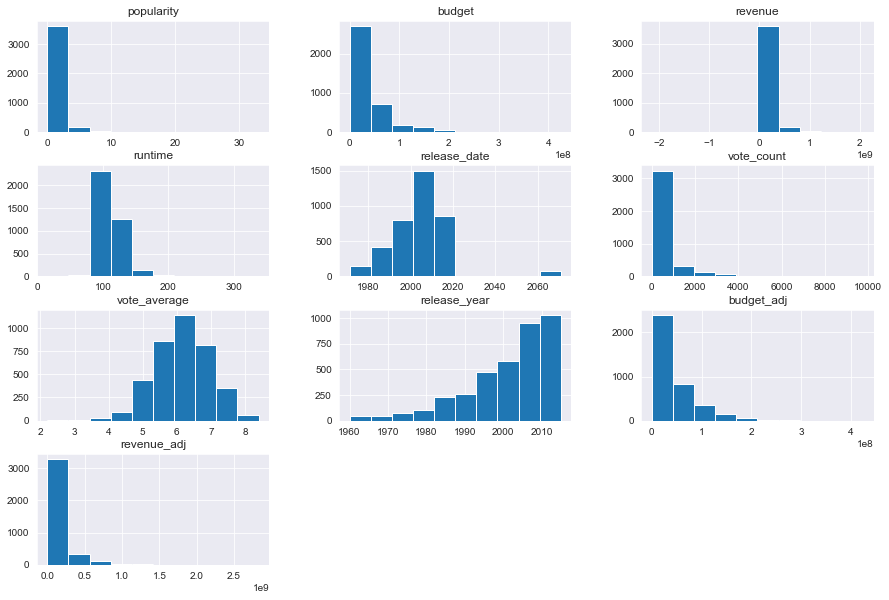

In [22]:
df.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the most popular genre of movies?)

In [23]:
# List of movies genres in our dataset
genres = df['genres'].unique()
print(genres)

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Thriller' 'Fantasy' 'History' 'Mystery'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie']


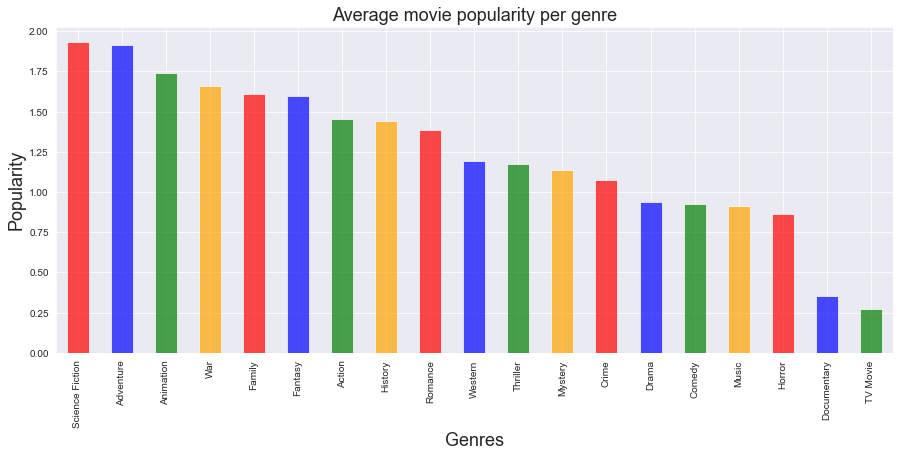

In [24]:
# Grouping genres and average popularity
popular_genres = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)
# Plotting a bar chart of the data
color = ['red','blue','green','orange']
popular_genres.plot(kind='bar', alpha=.7, figsize=(15,6), color=color)
plt.xlabel('Genres', fontsize=18);
plt.ylabel('Popularity', fontsize=18);
plt.xticks(fontsize=10)
plt.title('Average movie popularity per genre', fontsize=18);
plt.grid(True)

>**For this analysis part**: we sorted the genres by the average popularity and find out that there is no big deference between the genres average popularity, but the highest popular genres are ( Since fiction, Adventure ) and the least popular genres are ( Documentary , TV movies ).

### Research Question 2  (What is the highest revenue per genres?)

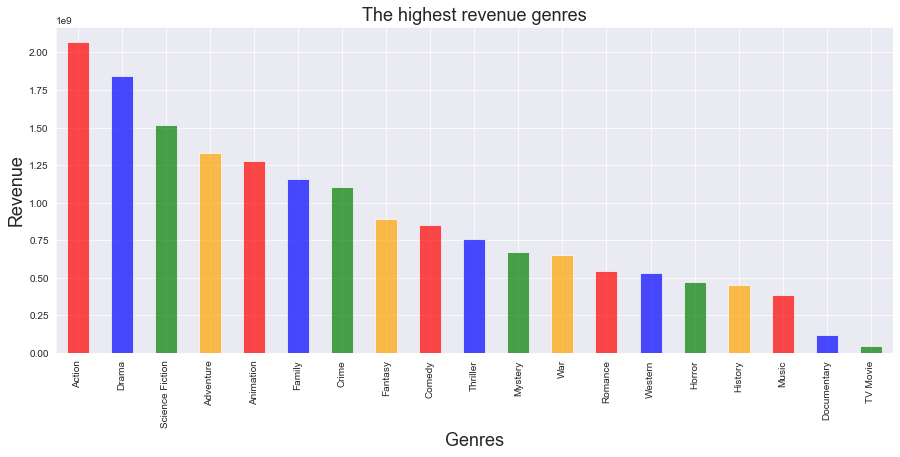

In [25]:
# Grouping genres and max revenue
high_genres = df.groupby('genres')['revenue'].max().sort_values(ascending=False)
# Plotting a bar chart of the data
color = ['red','blue','green','orange']
high_genres.plot(kind='bar', alpha=.7, figsize=(15,6), color=color)
plt.xlabel('Genres', fontsize=18);
plt.ylabel('Revenue', fontsize=18);
plt.xticks(fontsize=10)
plt.title('The highest revenue genres', fontsize=18);
plt.grid(True)

> **Here we sorted genres by revenue**: we found out that despite ( Since fiction, Adventure) are the most popular genres but there are not the most high revenue , (Action , Drama) are the genres with the most high revenue.

### Research Question 3  (What is the most dominant genre of movies?)

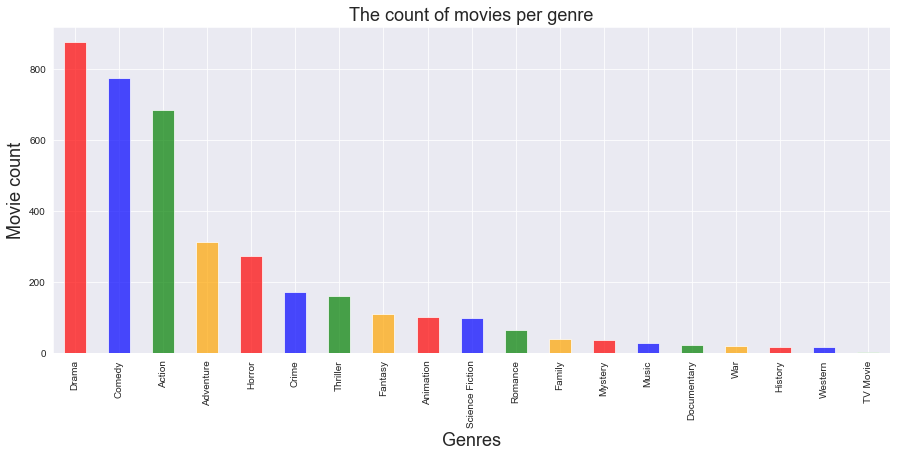

In [26]:
# Grouping genres and movie counts
total_genres_movies = df.groupby('genres')['original_title'].count().sort_values(ascending=False)
# Plotting a bar chart of the data
color = ['red','blue','green','orange']
total_genres_movies.plot(kind='bar', alpha=.7, figsize=(15,6), color=color)
plt.xlabel('Genres', fontsize=18);
plt.ylabel('Movie count', fontsize=18);
plt.xticks(fontsize=10)
plt.title('The count of movies per genre', fontsize=18);
plt.grid(True)

> **This bar chart shows**: the count of movies par genres and we found out that ( Drama , Comedy , Action ) have more movies than all the other genres combined.

### Research Question 4  (Which production company is the biggest in number of productions?)

In [27]:
# Converting production companies column from object to string
df['production_companies'] = df['production_companies'].astype(str)

In [28]:
#Extracting the name of the most active production company
production = df['production_companies'].value_counts().idxmax()
print(production)

Universal Pictures


> **In this part**: we counted the production companies and found out that (Universal Pictures) is a very active company and have the highest count of movie production. 

### Research Question 5  (What is the correlation between popularity and profit?)

In [29]:
# Create new column for the profit
df['profit'] = df['revenue'] - df['budget']
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


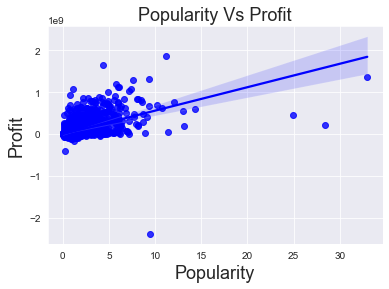

In [30]:
# Create a scatter plot to study relationship between popularity and porfit
ax = sns.regplot(x=df['popularity'], y=df['profit'], color='blue')
ax.set_title("Popularity Vs Profit", fontsize=18)
ax.set_xlabel("Popularity", fontsize=18)
ax.set_ylabel("Profit", fontsize=18)
sns.set(rc={'figure.figsize':(12, 8)})

> **This plot shows**: the correlation between popularity and profit and it shows that the correlation is positive.

### Research Question 6  (Which year have the most released movies?)

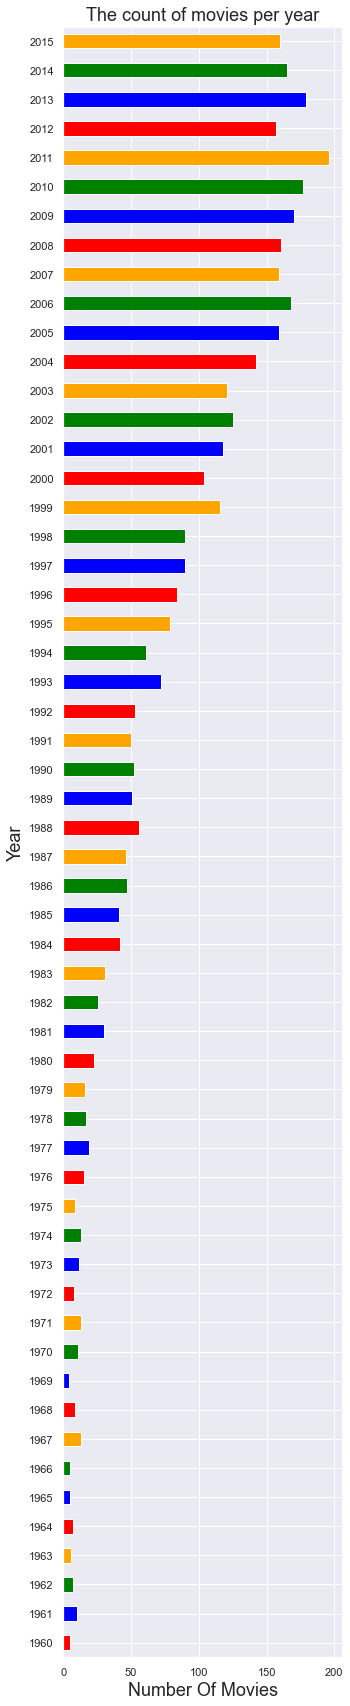

In [31]:
# release year counts and sort index them 
count_movies_year = df["release_year"].value_counts().sort_index()
# Plotting a bar chart of the data
color = ['red','blue','green','orange']
count_movies_year.plot(kind='barh',title='Number Of Movies vs Year', figsize=(5,30), color=color)
plt.xlabel('Number Of Movies', fontsize=18);
plt.ylabel('Year', fontsize=18);
plt.title('The count of movies per year', fontsize=18);

>**Here**: we used a timeline to show a visual count of movie releases by year , we found out that the period between 2005 and 2015 has the highest movie releases of all time and 2011 is the highest year, we should call 2011 **( The year of cinema of all time )**.

<a id='conclusions'></a>
## Conclusions
<ol>
    <li>The highest average popularity of movie genres is science fiction</li>
    <li>The highest revenue genres : Action then Drama and science fiction</li>
    <li>The most released movie genre is Drama</li>
    <li>The most active production company is Universal Pictures</li>
    <li>The correlation between popularity and profit is positive</li>
    <li>2011 have the largest number of released movies</li>
    </ol>

## Limitations
<ul>
    <li>Missing values in the data effect the results</li>
    <li>Multi values which made us choose only the first value could affect our accuracy</li>
    <li>inccorect datatype</li>
    <li>we lost some of the data in the data cleaning steps</li>